   size  latency  Min Latency(us)  Max Latency(us)  Iterations  np  \
0     1     0.18             0.17             0.19       10000   4   
1     2     0.18             0.17             0.19       10000   4   
2     4     0.18             0.17             0.18       10000   4   
3     8     0.18             0.17             0.19       10000   4   
4    16     0.18             0.17             0.19       10000   4   

      algorithm size2  
0  basic linear   2^0  
1  basic linear   2^1  
2  basic linear   2^2  
3  basic linear   2^3  
4  basic linear   2^4  
Index(['size', 'latency', 'Min Latency(us)', 'Max Latency(us)', 'Iterations',
       'np', 'algorithm', 'size2'],
      dtype='object')


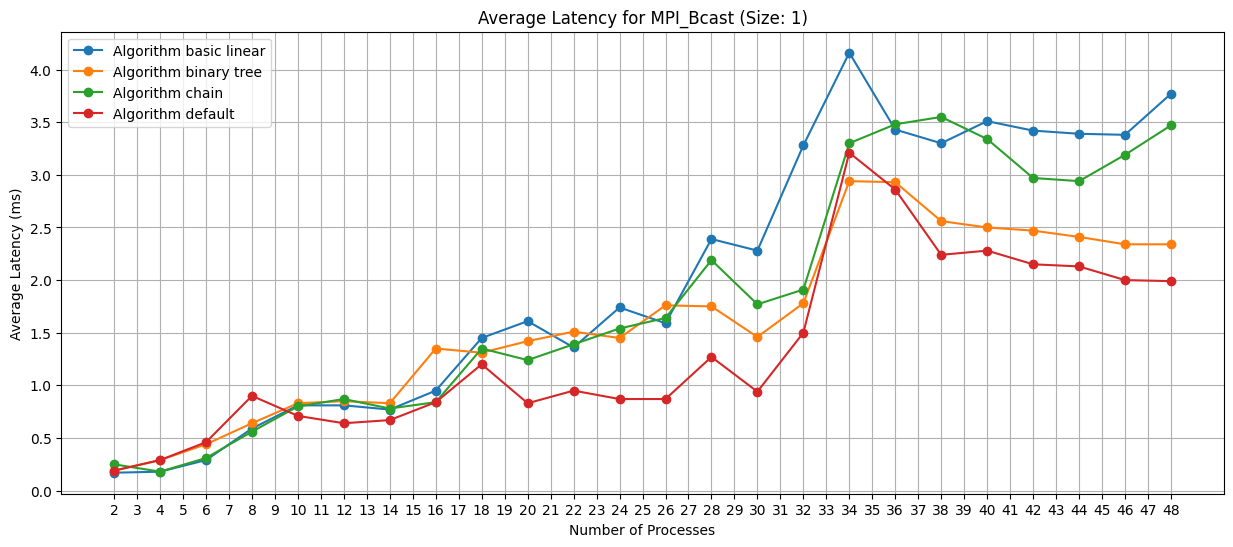

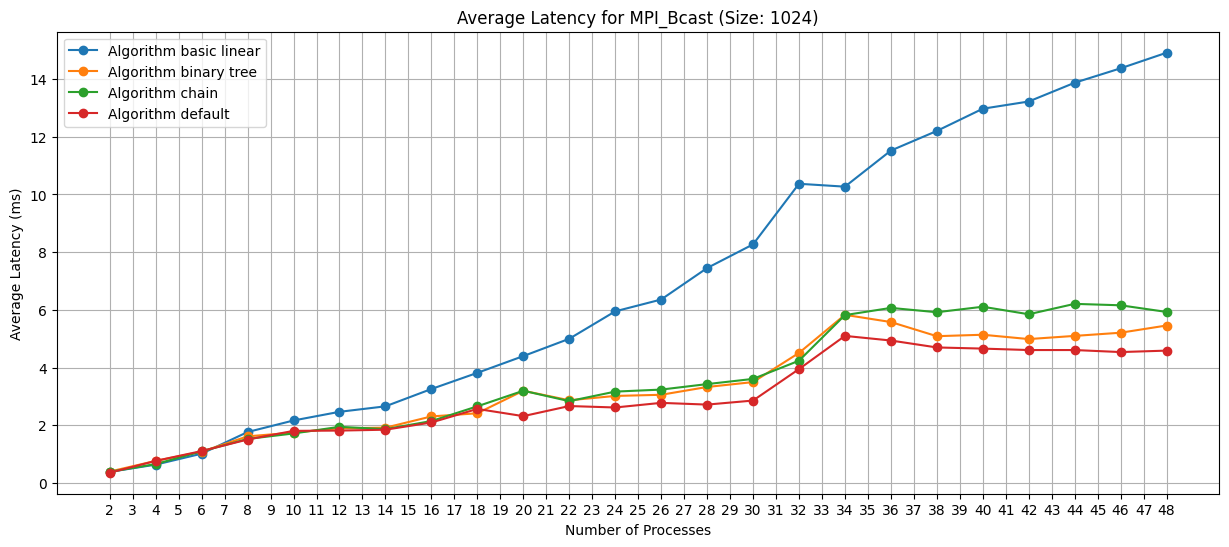

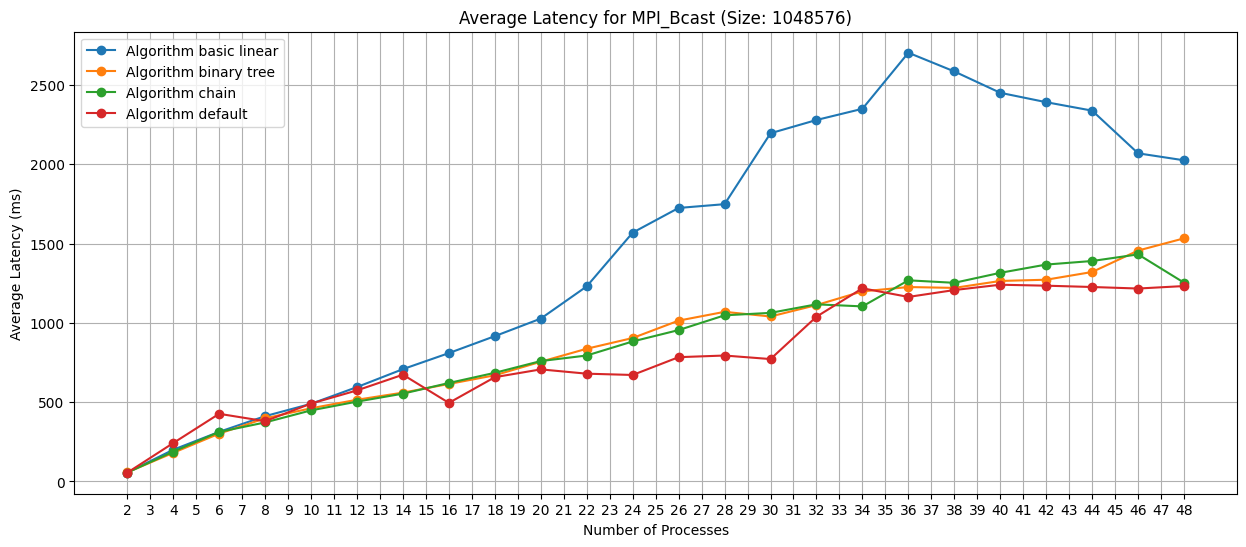

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'bcast_results.csv'
data = pd.read_csv(file_path)

# Display the first few rows and column names to understand the structure
print(data.head())
print(data.columns)

# Define the sizes we're interested in
sizes_to_plot = [1, 1024, 1048576]

# Check if the required columns are present
if 'np' in data.columns and 'latency' in data.columns and 'algorithm' in data.columns and 'size' in data.columns:
    # Filter the data for the specified sizes
    filtered_data = data[data['size'].isin(sizes_to_plot)]

    # Calculate the average latency for each combination of np, size, and algorithm
    avg_latency = filtered_data.groupby(['np', 'size', 'algorithm'])['latency'].mean().reset_index()

    # Plot the average latency for each size separately
    for size in sizes_to_plot:
        subset = avg_latency[avg_latency['size'] == size]
        
        # Make the graph wider horizontally
        plt.figure(figsize=(15, 6))  # Increased width from 10 to 15 inches
        for algorithm in subset['algorithm'].unique():
            algo_subset = subset[subset['algorithm'] == algorithm].sort_values(by='np')
            plt.plot(algo_subset['np'], algo_subset['latency'], marker='o', label=f'Algorithm {algorithm}')
        
        plt.title(f'Average Latency for MPI_Bcast (Size: {size})')
        plt.xlabel('Number of Processes')
        plt.ylabel('Average Latency (ms)')
        plt.legend()
        plt.grid(True)
        
        # Set x-axis to show all numbers of processes
        plt.xticks(range(algo_subset['np'].min(), algo_subset['np'].max() + 1))
        
        plt.savefig(f'bcast_avg_latency_size_{size}.png')
        plt.show()
else:
    print("The required columns 'np', 'latency', 'algorithm', and 'size' are not present in the CSV file.")
